<a href="https://colab.research.google.com/github/hk131999/NOPD_data_cleaning/blob/main/NOPD_record_cleanign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('NOPD_Use_of_Force_Incidents.csv',na_values='0000')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,PIB File Number,Date Occurred,Originating Bureau,Division level,Division,Unit,Working Status,Shift,Investigation status,Disposition,...,Subject Ethnicity,Subject Age,Subject Build,Subject Height,Subject Injured,Subject Hospitalized,Subject Arrested,Subject Arrest Charges,Use of Force Reason,Officer Injured
0,FTN2021-0378,12/01/2021,FOB - Field Operations Bureau,8th District,Staff,Staff Other,Regular Working,Between 3pm-11pm,Initial,Pending,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,refuse verbal commands,No
1,FTN2017-0011,01/13/2017,FOB - Field Operations Bureau,7th District,Day Watch,Patrol,Regular Working,Between 7am-3pm,Completed,Use Of Force Authorized,...,Black | Black,25 | 19,Small | Small,5'10'' to 6'0'' | 5'10'' to 6'0'',No | No,No | No,Yes | Yes,NaN,Other,No
2,FTN2017-0010,01/13/2017,FOB - Field Operations Bureau,Special Operations Division,Tactical Section,V.O.W.S. Unit,Regular Working,NaN,Completed,Use Of Force Authorized,...,Black,30,Medium,5'7'' to 5'9'',No,No,Yes,NaN,Resisting Lawful Arrest,No | No
3,FTN2017-0473,09/10/2017,FOB - Field Operations Bureau,8th District,3rd Platoon,NaN,Paid Detail,Between 3pm-11pm,Completed,Use Of Force Authorized,...,Black | Black | Black | Black,23 | 22 | 21 | 24,XLarge | XLarge | XLarge | XLarge,5'7'' to 5'9'' | 5'7'' to 5'9'' | 5'7'' to 5'9...,No | No | No | No,No | No | No | No,Yes | Yes | Yes | Yes,NaN,Other,No
4,FTN2018-0427,11/18/2018,FOB - Field Operations Bureau,8th District,C Platoon,Patrol,Regular Working,Between 11pm-7am,Completed,UOF Justified,...,White,28,Medium,6'1'' to 6'3'',No,No,Yes,NaN,Battery on Police Officer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,FTN2021-0318,10/09/2021,FOB - Field Operations Bureau,1st District,B Platoon,Patrol,Regular Working,Between 11pm-7am,Completed,UOF Justified,...,Black | Black,61 | 48,Medium | Medium,5'7'' to 5'9'' | 5'7'' to 5'9'',No | No,No | No,Yes | Yes,NaN,refuse verbal commands,No
3190,FTN2021-0319,10/10/2021,FOB - Field Operations Bureau,7th District,D.I.U.,NaN,Regular Working,Between 7am-3pm,Completed,UOF Justified,...,Black | Black,NaN,Medium | Medium,5'10'' to 6'0'' | 5'10'' to 6'0'',No | No,No | No,No | No,NaN,refuse verbal commands,No
3191,FTN2021-0320,10/11/2021,FOB - Field Operations Bureau,Special Operations Division,C Platoon,NaN,Regular Working,Between 3pm-11pm,Completed,UOF Justified,...,Black,19,Small,5'10'' to 6'0'',No,No,Yes,NaN,Resisting Lawful Arrest,No
3192,FTN2021-0321,10/12/2021,FOB - Field Operations Bureau,7th District,B Platoon,Patrol,Regular Working,Between 3pm-11pm,Completed,UOF Justified,...,Black,31,Medium,5'10'' to 6'0'',No,No,Yes,NaN,Room clearing,No


In [ ]:
df.columns

Index(['PIB File Number', 'Date Occurred', 'Originating Bureau',
       'Division level', 'Division', 'Unit', 'Working Status', 'Shift',
       'Investigation status', 'Disposition', 'Service Type',
       'Light Condition', 'Weather Condition', 'Use of Force Type',
       'Use of Force Level', 'Subject Influencing Factors',
       'Use of Force Effective', 'Officer Race/Ethnicity', 'Officer Gender',
       'Officer Age', 'Officer Years of Service', 'Distance Between',
       'Subject Gender', 'Subject Ethnicity', 'Subject Age', 'Subject Build',
       'Subject Height', 'Subject Injured', 'Subject Hospitalized',
       'Subject Arrested', 'Subject Arrest Charges', 'Use of Force Reason',
       'Officer Injured'],
      dtype='object')

In [ ]:
len(FL)

3194

In [ ]:
df.fillna("Unknown",inplace=True)

In [ ]:
data=[]
for i in range(len(df)):

  UOFL=(df['Use of Force Level'][i]).split("|")
  UOFT=(df['Use of Force Type'][i]).split("|")
  UOFE=(df['Use of Force Effective'][i]).split("|")
  OE=(df['Officer Race/Ethnicity'][i]).split("|")
  OG=(df['Officer Gender'][i]).split("|")
  OA=(df['Officer Age'][i]).split("|")
  OYOS=(df['Officer Years of Service'][i]).split("|")
  OI=(df['Officer Injured'][i]).split("|")

  if(UOFL.count('|')>0):
    UOFL.remove('|')
    UOFT.remove('|')
    UOFE.remove('|')
    OE.remove('|')
    OG.remove('|')
    OA.remove('|')
    OYOS.remove('|')
    OI.remove('|')
  for j in range(len(UOFL)):
    item={}
    item['PIB File Number'] =(df['PIB File Number'][i])
    item['Date Occurred']=df['Date Occurred'][i]
    item['Originating Bureau']=df['Originating Bureau'][i]
    item['Division level']=df['Division level'][i]
    item['Unit']=df['Unit'][i]
    item['Workning Status']=df['Working Status'][i]
    item['Shift']=df['Shift'][i]
    item['Investigation status']=df['Investigation status'][i]
    item['Disposition']=df['Disposition'][i]
    item['Service Type']=df['Service Type'][i]
    item['Light Condition']=df['Light Condition'][i]
    item['Weather Condition']=(df['Weather Condition'][i])
    item['Use of Force Level']=UOFL[j]
    item['Use of Force Type']=UOFT[j]
    item['Use of Force Effective']=UOFE[j]
    item['Officer Race/Ethnicity']=OE[j]
    item['Officer Gender']=OG[j]
    item['Officer Age']=OA[j]
    item['Officer Years of Service']=OYOS[j]
    item['Officer Injured']=OI[j]
    data.append(item)
    

In [ ]:
pd.DataFrame(data).to_csv('1.csv',index=False)

In [ ]:
data2=[]
for i in range(len(df)):
  SIF=(df['Subject Influencing Factors'][i]).split("|")
  SE=(df['Subject Ethnicity'][i]).split('|')
  SG=(df['Subject Gender'][i]).split("|")
  SA=(df['Subject Age'][i]).split("|")
  SB=(df['Subject Build'][i]).split('|')
  SH=(df['Subject Height'][i]).split('|')
  SI=(df['Subject Injured'][i]).split('|')
  SHD=(df['Subject Hospitalized'][i]).split('|')
  SAD=(df['Subject Arrested'][i]).split("|")

  if(SIF.count('|')>0):
    SIF.remove("|")
    SE.remove('|')
    SG.remove("|")
    SA.remove("|")
    SB.remove("|")
    SH.remove("|")
    SI.remove("|")
    SHD.remove("|")
    SAD.remove("|")
  for j in range(len(SIF)):
    item={}
   
    item['PIB File Number'] =(df['PIB File Number'][i])
    item['Date Occurred']=df['Date Occurred'][i]
    item['Originating Bureau']=df['Originating Bureau'][i]
    item['Division level']=df['Division level'][i]
    item['Unit']=df['Unit'][i]
    item['Workning Status']=df['Working Status'][i]
    item['Shift']=df['Shift'][i]
    item['Investigation status']=df['Investigation status'][i]
    item['Disposition']=df['Disposition'][i]
    item['Service Type']=df['Service Type'][i]
    item['Light Condition']=df['Light Condition'][i]
    item['Weather Condition']=(df['Weather Condition'][i])
    item['Subject Influencing Factors']=SIF[j]
    item['Subject Ethnicity']=SE[j]
    item['Subject Gender']=SG[j]
    try:
      item['Subject Age']=SA[j]
      item['Subject Build']=SB[j]
      item['Subject Height']=SH[j]
      item['Subject Injured']=SI[j]
      item['Subject Hospitalized']=SHD[j]
      item['Subject Arrested']=SAD[j]
    except IndexError:
       item['Subject Age']='Unknown'
       item['Subject Height']='Unknown'
       item['Subject Build']='Unknown'
       item['Subject Injured']='Unknown'
       item['Subject Hospitalized']='Unknown'
       item['Subject Arrested']='Unknown'
    
   
    data2.append(item)

In [ ]:
pd.DataFrame(data2).to_csv('2.csv',index=False)


In [ ]:
subject_data=pd.read_csv('2.csv')

In [ ]:
subject_data.head(2)

,PIB File Number,Date Occurred,Originating Bureau,Division level,Unit,Workning Status,Shift,Investigation status,Disposition,Service Type,...,Weather Condition,Subject Influencing Factors,Subject Ethnicity,Subject Gender,Subject Age,Subject Build,Subject Height,Subject Injured,Subject Hospitalized,Subject Arrested
0,FTN2021-0378,12/01/2021,FOB - Field Operations Bureau,8th District,Staff Other,Regular Working,Between 3pm-11pm,Initial,Pending,Arresting,...,Clear Conditions,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,FTN2017-0011,01/13/2017,FOB - Field Operations Bureau,7th District,Patrol,Regular Working,Between 7am-3pm,Completed,Use Of Force Authorized,Call for Service,...,Clear Conditions,None detected,Black,Male,25,Small,5'10'' to 6'0'',No,No,Yes


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Subject Ethnicity', ylabel='count'>

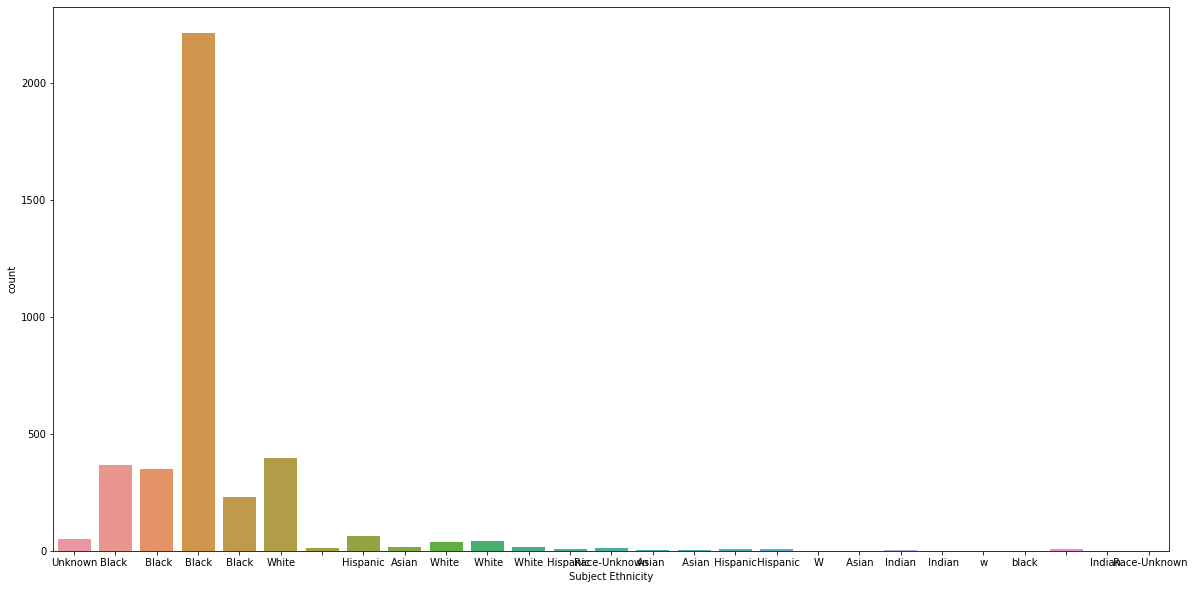

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=subject_data,x=subject_data['Subject Ethnicity'],ax=ax)